# Title : Analyzing Weather Data from OpenWeatherMap API

In [1]:
import requests 
import pandas as pd 
import datetime

In [2]:
# Set your OpenWeatherMap API key
api_key = 'fb365aa6104829b44455572365ff3b4e' 

In [3]:
# Set the location for which you want to retrieve weather data 
lat = 18.184135
lon = 74.610764

In [4]:
# https://openweathermap.org/api/one-call-3
# how	How to use api call 
# Construct the API URL
api_url = f"http://api.openweathermap.org/data/2.5/forecast?lat={lat}&lon={lon}&appid={api_key}"

In [5]:
# Send a GET request to the API 
response = requests.get(api_url)
weather_data = response.json()
weather_data.keys()
len(weather_data['list'])
weather_data['list'][0]['weather'][0]['description']

'broken clouds'

In [6]:
# Getting the data from dictionary and taking into one variable 
# Extract relevant weather attributes using list comprehension
temperatures = [item['main']['temp'] for item in weather_data['list']] 

# It will extract all values (40) and putting into one variable
timestamps = [pd.to_datetime(item['dt'], unit='s') for item in weather_data['list']]
temperature = [item['main']['temp'] for item in weather_data['list']]
humidity = [item['main']['humidity'] for item in weather_data['list']]
wind_speed = [item['wind']['speed'] for item in weather_data['list']]
weather_description = [item['weather'][0]['description'] for item in weather_data['list']]

In [7]:
# Create a pandas DataFrame with the extracted weather data
weather_df = pd.DataFrame({'Timestamp': timestamps, 
                           'Temperature': temperatures, 
                           'humidity': humidity, 
                           'wind_speed':wind_speed,
                           'weather_description': weather_description})

In [8]:
# Set the Timestamp column as the DataFrame's index
weather_df.set_index('Timestamp', inplace=True)
max_temp = weather_df['Temperature'].max()
print(f"Maximum Temperature - {max_temp}")
min_temp = weather_df['Temperature'].min()
print(f"Minimum Temperature - {min_temp}")

Maximum Temperature - 303.34
Minimum Temperature - 293.35


In [9]:
# Clean and preprocess the data # Handling missing values
weather_df.fillna(0, inplace=True) # Replace missing values with 0 or appropriate value

In [10]:
# Handling inconsistent format (if applicable)
weather_df['Temperature'] = weather_df['Temperature'].apply(lambda x: x - 273.15 if isinstance(x, float)else x)

In [11]:
# Convert temperature from Kelvin to Celsius
# Print the cleaned and preprocessed data print(weather_df)
print(weather_df)

                     Temperature  humidity  wind_speed weather_description
Timestamp                                                                 
2025-10-04 12:00:00        29.36        53        2.76       broken clouds
2025-10-04 15:00:00        26.89        67        5.27          light rain
2025-10-04 18:00:00        23.60        85        4.67          light rain
2025-10-04 21:00:00        22.50        87        3.67     overcast clouds
2025-10-05 00:00:00        21.89        89        3.05     overcast clouds
2025-10-05 03:00:00        23.75        78        2.96     overcast clouds
2025-10-05 06:00:00        27.45        61        2.79       broken clouds
2025-10-05 09:00:00        29.66        51        2.65       broken clouds
2025-10-05 12:00:00        26.34        69        3.77          light rain
2025-10-05 15:00:00        23.61        82        5.73          light rain
2025-10-05 18:00:00        22.33        84        4.50          light rain
2025-10-05 21:00:00      

In [12]:
import matplotlib.pyplot as plt
daily_mean_temp = weather_df['Temperature'].resample('D').mean()
daily_mean_humidity = weather_df['humidity'].resample('D').mean()
daily_mean_wind_speed = weather_df['wind_speed'].resample('D').mean()

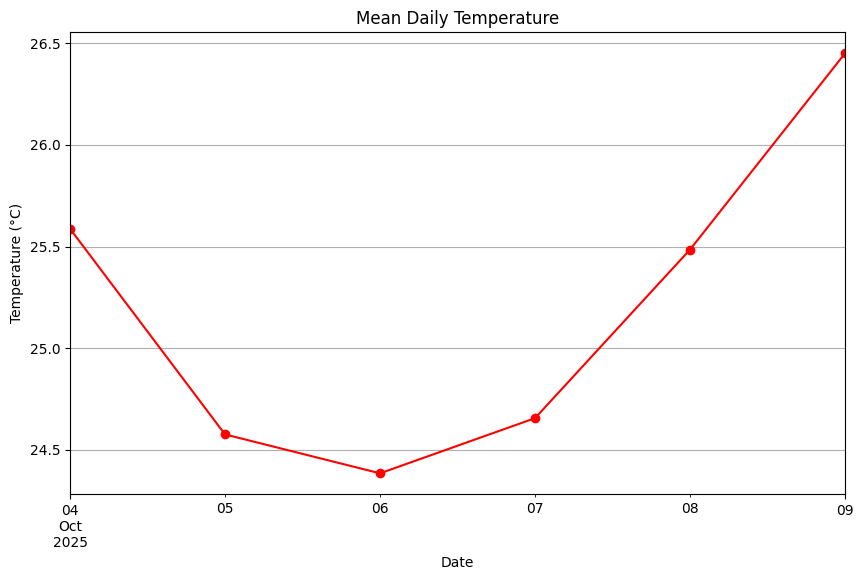

In [13]:
# Plot the mean daily temperature over time (Line plot)
plt.figure(figsize=(10, 6))
daily_mean_temp.plot(color='red', linestyle='-', marker='o')
plt.title('Mean Daily Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()

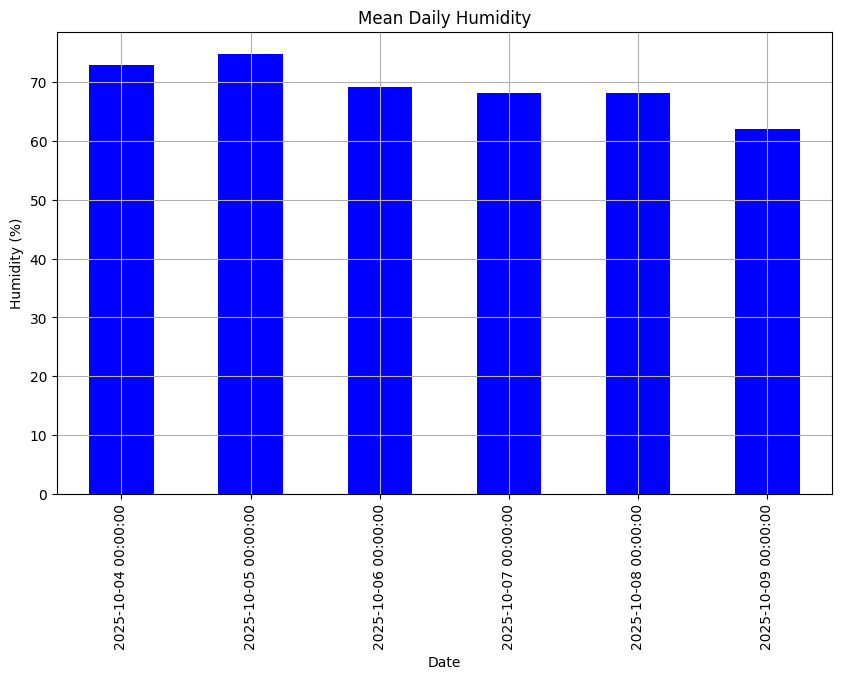

In [14]:
# Plot the mean daily humidity over time (Bar plot)
plt.figure(figsize=(10, 6))
daily_mean_humidity.plot(kind='bar', color='blue')
plt.title('Mean Daily Humidity')
plt.xlabel('Date')
plt.ylabel('Humidity (%)')
plt.grid(True)
plt.show()

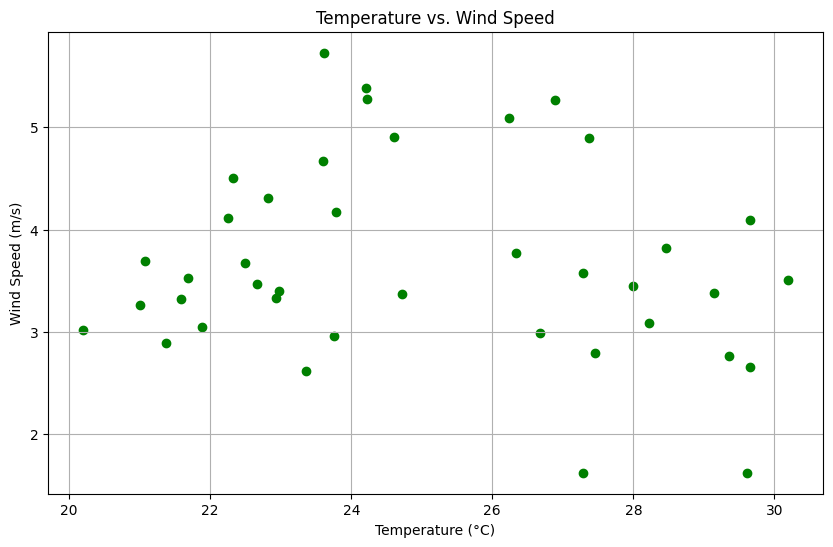

In [15]:
# Plot the relationship between temperature and wind speed (Scatter plot)
plt.figure(figsize=(10, 6))
plt.scatter(weather_df['Temperature'], weather_df['wind_speed'], color='green')
plt.title('Temperature vs. Wind Speed')
plt.xlabel('Temperature (°C)')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)
plt.show()

In [19]:
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ---------------------------------------- 0.0/114.6 kB ? eta -:--:--
     --------- --------------------------- 30.7/114.6 kB 660.6 kB/s eta 0:00:01
     ----------------------- ------------- 71.7/114.6 kB 660.6 kB/s eta 0:00:01
     ------------------------------------ 114.6/114.6 kB 957.1 kB/s eta 0:00:00
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.1/8.1 MB 2.6 MB/s eta 0:00:04
   - -------------------------------------- 0.3/8.1 MB 4.0 MB/s eta 0:00:02
   - -------------------------------------- 0.4/8.1 MB 3.2 MB/s eta 0:00:03
   -- ------------------------------------- 0.5/8.1 MB 3.2 MB/s eta 0:00:03
   --- ------------------------------------ 0.6/8.1 MB 3.1 MB/s eta 0:00:03
   --- ------------------------------------ 0.8/8.1 MB 

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: C:\Users\SWARUP\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [18]:
# Heatmap
import seaborn as sns
heatmap_data = weather_df[['Temperature', 'humidity']]
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm')
plt.title('Temperature vs Humidity Heatmap')
plt.show()

ModuleNotFoundError: No module named 'seaborn'

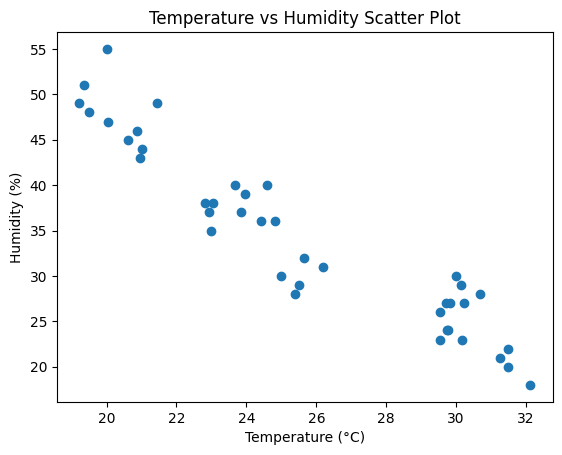

In [ ]:
# Create a scatter plot to visualize the relationship between temperature and humidity
plt.scatter(weather_df['Temperature'], weather_df['humidity'])
plt.xlabel('Temperature (°C)')
plt.ylabel('Humidity (%)')
plt.title('Temperature vs Humidity Scatter Plot')
plt.show()